<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/20_1_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기존에 학습된 모델을 활용하여 신규 데이터를 학습시킵니다. 
데이터가 부족한 경우 활용할 수 있으며, 
정확도 향상에 도움이 됩니다. 

https://www.tensorflow.org/tutorials/images/transfer_learning


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)

In [ ]:
img_height = 224
img_width = 224
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  label_mode='categorical'  
  )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  label_mode='categorical'
  )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
for image, label in train_ds:
  print(image.shape)
  print(label.shape)
  print(image[0, :, :, 0])
  break


(32, 224, 224, 3)
(32, 5)
tf.Tensor(
[[ 88.21429   89.        88.26817  ... 237.52782  238.2685   237.4094  ]
 [ 89.21301   89.63808   90.93144  ... 197.41612  187.17563  170.08623 ]
 [ 92.08035   91.52136   93.626595 ... 142.80666  162.18947  192.16609 ]
 ...
 [ 83.56525   86.21117   55.612103 ...  72.12231   78.59759   78.58755 ]
 [ 86.87597   72.57438   53.019104 ...  62.46863   57.714993  61.05212 ]
 [ 79.045135  56.173065  50.534885 ...  67.0228    51.191677  54.64547 ]], shape=(224, 224), dtype=float32)


In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# 사전 훈련된 모델 MobileNet V2에서 기본 모델을 생성합니다.
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(5, activation='softmax')

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
epochs = 10
history = model.fit(train_ds,
                    epochs=epochs,
                    validation_data=val_ds)

Epoch 1/10
92/92 [==============================] - 13s 146ms/step - loss: 0.7287 - acc: 0.7343 - val_loss: 0.4603 - val_acc: 0.8597
Epoch 2/10
92/92 [==============================] - 12s 136ms/step - loss: 0.3850 - acc: 0.8706 - val_loss: 0.3949 - val_acc: 0.8774
Epoch 3/10
92/92 [==============================] - 13s 137ms/step - loss: 0.3169 - acc: 0.8913 - val_loss: 0.3622 - val_acc: 0.8883
Epoch 4/10
92/92 [==============================] - 13s 138ms/step - loss: 0.2678 - acc: 0.9135 - val_loss: 0.3438 - val_acc: 0.8896
Epoch 5/10
92/92 [==============================] - 13s 138ms/step - loss: 0.2313 - acc: 0.9305 - val_loss: 0.3354 - val_acc: 0.8937
Epoch 6/10
92/92 [==============================] - 13s 137ms/step - loss: 0.2066 - acc: 0.9380 - val_loss: 0.3379 - val_acc: 0.8896
Epoch 7/10
92/92 [==============================] - 13s 138ms/step - loss: 0.1849 - acc: 0.9513 - val_loss: 0.3286 - val_acc: 0.8896
Epoch 8/10
92/92 [==============================] - 13s 138ms/step - 

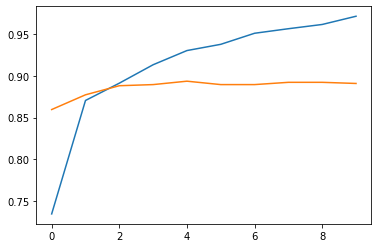

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [ ]:
model2 = tf.keras.Sequential([  
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(5,activation='softmax')
])

model2.compile(optimizer='adam', 
              loss = 'categorical_crossentropy',
              metrics=['acc'])

epochs = 10
history = model2.fit(train_ds,
                    epochs=epochs,
                    validation_data=val_ds)

Epoch 1/10
92/92 [==============================] - 12s 128ms/step - loss: 1.3599 - acc: 0.4166 - val_loss: 1.1470 - val_acc: 0.5232
Epoch 2/10
92/92 [==============================] - 12s 126ms/step - loss: 1.0726 - acc: 0.5688 - val_loss: 0.9640 - val_acc: 0.6308
Epoch 3/10
92/92 [==============================] - 12s 125ms/step - loss: 0.9314 - acc: 0.6410 - val_loss: 0.9220 - val_acc: 0.6199
Epoch 4/10
92/92 [==============================] - 12s 126ms/step - loss: 0.7882 - acc: 0.7037 - val_loss: 0.8921 - val_acc: 0.6458
Epoch 5/10
92/92 [==============================] - 12s 128ms/step - loss: 0.6080 - acc: 0.7718 - val_loss: 1.0257 - val_acc: 0.6417
Epoch 6/10
92/92 [==============================] - 12s 128ms/step - loss: 0.4340 - acc: 0.8484 - val_loss: 1.0574 - val_acc: 0.6907
Epoch 7/10
92/92 [==============================] - 12s 126ms/step - loss: 0.3166 - acc: 0.8866 - val_loss: 1.2086 - val_acc: 0.6730
Epoch 8/10
92/92 [==============================] - 12s 127ms/step - 

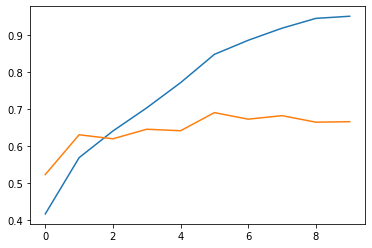

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

tensorflow hub에는 더 많은 모델이 있습니다. 
사용법은 약간 다릅니다. 

https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub?hl=ko